In [26]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import pandas as pd

In [27]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [29]:
inertia = []
k_values = range(1, 11)

In [30]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

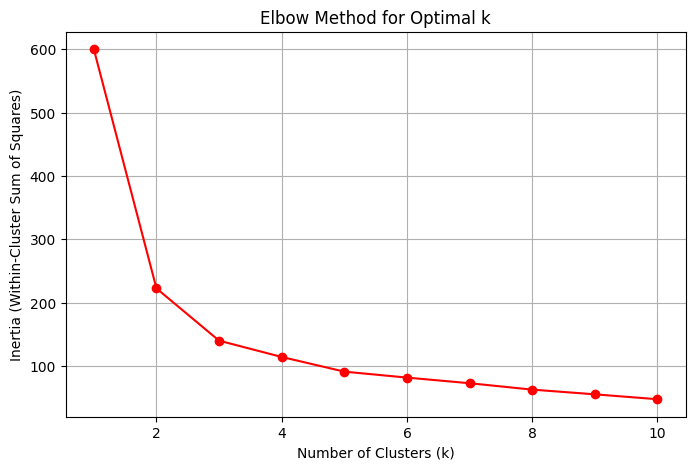

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='r')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.grid()
plt.show()

In [35]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

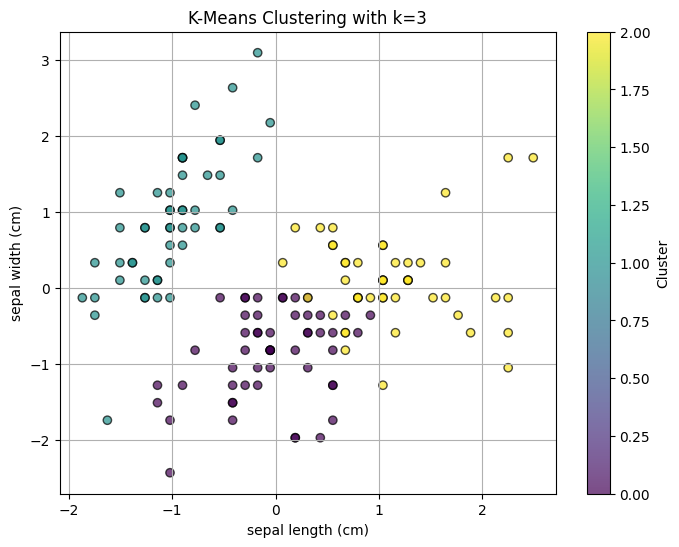

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', edgecolors='k', alpha=0.7)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title(f"K-Means Clustering with k={optimal_k}")
plt.colorbar(label="Cluster")
plt.grid()
plt.show()